In [93]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Data input and cleaning

In [94]:
import re
sns.set()
data = pd.read_csv("data.csv", dtype={'time':np.float64})

data['error'] = [float(x[1:-1]) for x in data['fbest']]

def sanitize(data):
    return ''.join(filter(lambda x: x in ',.0123456789', data))

data['history'] = data['fhistory'].apply(sanitize)
data['ctime'] = data['currenttime'].apply(sanitize)

data['frac'] = data['sol'].str.count("1")/40

data = data.join(data['freq'].str.split(', ', expand=True).apply(pd.to_numeric))

data.drop(["fbest", "freq", "Unnamed: 0", "fhistory", "currenttime"], axis=1, inplace=True)
    
data.rename(columns=lambda x: x+1 if type(x)==int else x, inplace=True)

data.head()

,crossover,errorLimit,f1,grad,nPop,sol,time,error,history,ctime,frac,1,2,3,4,5,6
0,ModalSixPoint,0.01,75,150,25,1011001101110011101001100010010100000000,3616.255543,14.626253,"38.53920804,33.26724649,33.26724649,33.2672464...","242.44504333,334.97832894,392.49918556,406.671...",0.425,73.157782,217.752115,330.051744,517.373529,718.490532,851.380918
1,ModalSixPoint,0.01,75,150,30,0110111011110101011000101011001000000000,3607.142828,13.023070,"35.08723076,31.86935915,31.86935915,31.8693591...","250.0094223,364.80231357,427.55551577,450.5762...",0.450,75.501568,217.801083,330.641588,521.773163,703.801622,830.274897
2,ModalSixPoint,0.01,75,150,35,0011111111010101011000100111110000000000,3624.153821,11.709488,"33.08312066,33.08312066,28.32967883,27.6630569...","371.24433541,475.44848919,533.14479423,565.416...",0.475,72.948595,229.021862,335.716745,519.839125,700.425879,835.250236
3,ModalSixPoint,0.01,75,150,40,1110111100110011011100100010011000001000,3611.640201,15.039521,"29.09630841,29.09630841,29.09630841,29.0963084...","420.30375361,501.11556697,573.28588939,634.451...",0.475,74.839758,225.023534,330.288000,539.029386,731.567776,846.204996
4,ModalSixPoint,0.01,75,150,45,1100111011111010011001001100010100000000,3622.289603,11.648636,"43.53316023,31.42993462,31.42993462,31.4299346...","429.23796368,534.69955516,704.30904126,765.992...",0.450,74.663484,223.718698,335.928018,514.709399,705.780666,836.576275


In [151]:
errors = data.drop(['crossover', 'errorLimit', 'sol', 'time', 'history', 'frac', "f1", "grad"], axis=1)
errors.drop([x for x in errors.columns if type(x)==int], axis=1, inplace=True)
mean_errors = errors.groupby(["nPop"], as_index=False).describe()["error"]
mean_errors.rename(index={k:v for k, v in [(x, 25+x*5) for x in range(8)]})

,count,mean,std,min,25%,50%,75%,max
25,8.0,12.898295,1.354260,11.384847,12.056266,12.362810,14.282206,14.626253
30,8.0,15.055165,2.741873,11.408119,12.944415,14.746820,17.412550,18.425767
35,8.0,13.838773,2.702319,11.147297,11.654669,13.646472,14.771343,19.459175
40,8.0,13.519830,2.438356,10.303400,11.907436,13.063055,15.054463,17.986972
45,8.0,14.031929,2.779025,11.648636,12.207503,13.311717,14.199876,20.130866
50,8.0,12.613530,1.434271,10.468607,11.872125,12.709218,13.285406,15.054452
55,8.0,13.747596,2.340182,10.707501,12.240924,13.404445,15.692577,16.997748
60,8.0,13.411773,2.514265,10.541909,12.134813,13.104931,13.758507,18.932495


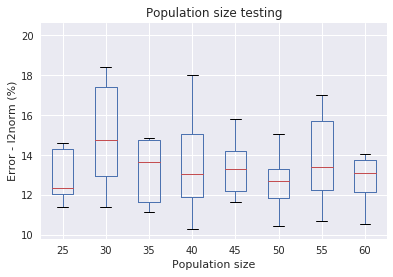

In [96]:
errors.boxplot(by="nPop")
plt.suptitle("")
plt.xlabel("Population size")
plt.ylabel("Error - l2norm (%)")
plt.title("Population size testing")
plt.show()

In [97]:
history = data.drop(['crossover', 'errorLimit', 'sol', 'time', 'frac', "f1", "grad", "error"], axis=1)
history.drop([x for x in history.columns if type(x)==int], axis=1, inplace=True)
history = pd.concat([history, history['history'].str.split(',', expand=True).apply(pd.to_numeric)], axis=1)
history.drop(["history"], axis=1, inplace=True)

history["ctime"] = history['ctime'].str.split(',', expand=False).apply(pd.to_numeric)

history.head()

,nPop,ctime,0,1,2,3,4,5,6,7,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,25,"[242.44504333, 334.97832894, 392.49918556, 406...",38.539208,33.267246,33.267246,33.267246,33.267246,33.267246,32.899856,32.814273,...,14.626253,14.626253,14.626253,14.626253,14.626253,14.626253,14.626253,14.626253,14.626253,14.626253
1,30,"[250.0094223, 364.80231357, 427.55551577, 450....",35.087231,31.869359,31.869359,31.869359,29.391753,26.043464,25.340240,25.340240,...,13.023070,13.023070,13.023070,13.023070,13.023070,13.023070,13.023070,13.023070,13.023070,13.023070
2,35,"[371.24433541, 475.44848919, 533.14479423, 565...",33.083121,33.083121,28.329679,27.663057,27.663057,27.663057,27.663057,27.213614,...,11.709488,11.709488,11.709488,11.709488,11.709488,11.709488,11.709488,11.709488,11.709488,11.709488
3,40,"[420.30375361, 501.11556697, 573.28588939, 634...",29.096308,29.096308,29.096308,29.096308,24.269059,24.269059,23.865293,23.865293,...,15.039521,15.039521,15.039521,15.039521,15.039521,15.039521,15.039521,15.039521,15.039521,15.039521
4,45,"[429.23796368, 534.69955516, 704.30904126, 765...",43.533160,31.429935,31.429935,31.429935,29.043148,29.043148,29.043148,26.037102,...,11.648636,11.648636,11.648636,11.648636,11.648636,11.648636,11.648636,11.648636,11.648636,11.648636


In [98]:
tseries = [[],[]]
for index, row in history.iterrows():
    tseries[1].append(pd.Series([row[x] for x in history.columns if type(x)==int], index=row["ctime"]))
    tseries[0].append(row["nPop"])


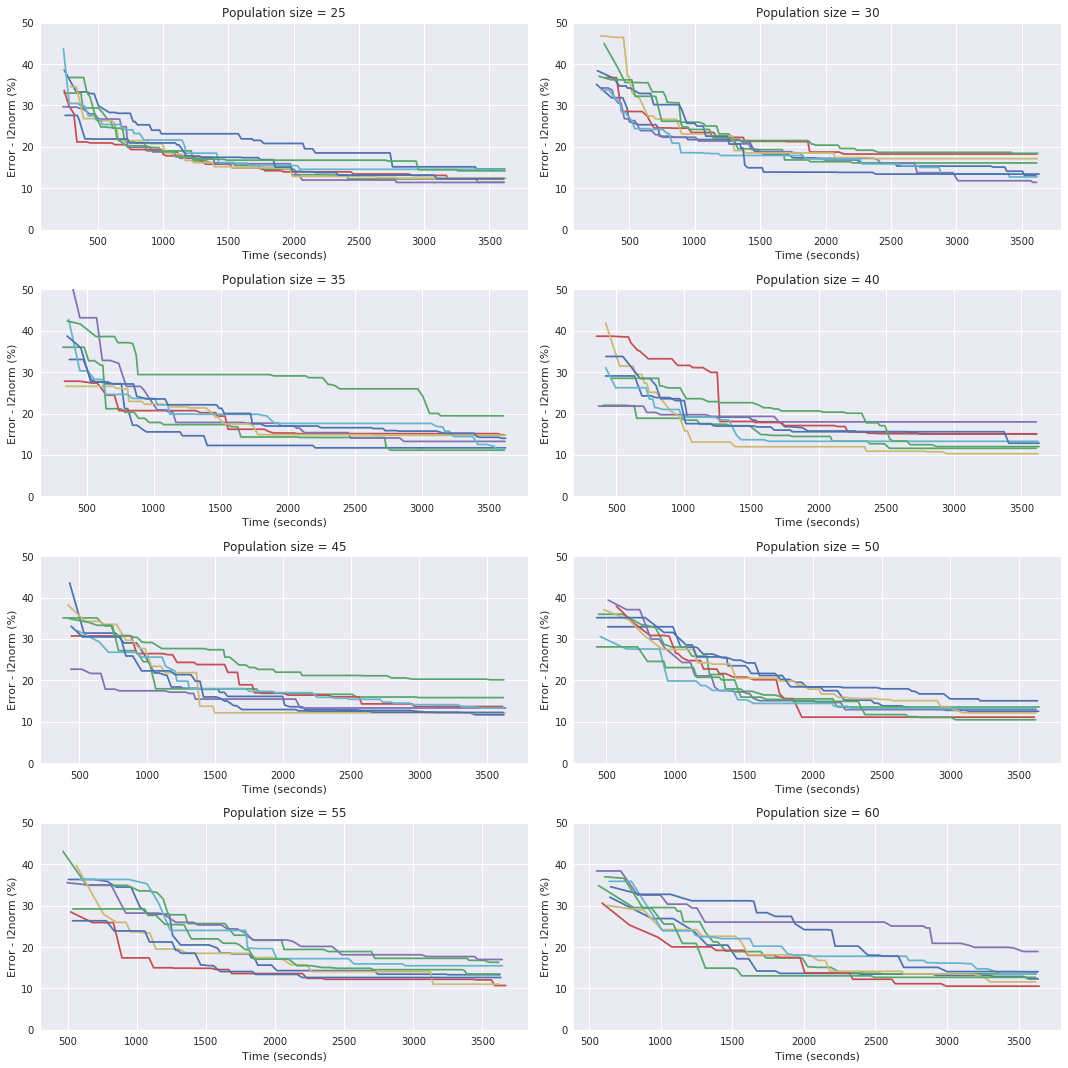

In [139]:
fig = plt.figure(figsize=(15, 15))

for index, i in enumerate([25, 30, 35, 40, 45, 50, 55, 60]):
    fig.add_subplot(4, 2, index+1)
    popseries = [tseries[1][x] for x in range(len(tseries[0])) if tseries[0][x] == i]
    for k in popseries:
        plt.plot(k)
    plt.title("Population size = {}".format(i))
    plt.xlabel("Time (seconds)")
    plt.ylabel("Error - l2norm (%)")
    plt.ylim([0, 50])
    
plt.tight_layout()
plt.show()